In [1]:
import xarray as xr
import os
import glob
import matplotlib.pyplot as plt

- Tricky to find variables
- Will require a regrid
- Think i should just take a look a this when I come back, or possibly in some spare moments

In [2]:
basedir = "/gws/nopw/j04/co2clim/datasets/iCESM1.2_Eocene/"
os.listdir(basedir)

['b.e12.B1850C5CN.f19_g16.iPETM01x.02.pop.h.2701-2800.climo-013.nc',
 'b.e12.B1850C5CN.f19_g16.iPETM03x.03.pop.h.2101-2200.climo-012.nc',
 'b.e12.B1850C5CN.f19_g16.iPETM03x.OrbMaxN.01.pop.h.2601-2700.climo-014.nc',
 'b.e12.B1850C5CN.f19_g16.iPETM03x.OrbMaxS.01.pop.h.2601-2700.climo-017.nc',
 'b.e12.B1850C5CN.f19_g16.iPETM03x.OrbMin.01.pop.h.2601-2700.climo-011.nc',
 'b.e12.B1850C5CN.f19_g16.iPETM06x.09.pop.h.2101-2200.climo-018.nc',
 'b.e12.B1850C5CN.f19_g16.iPETM06x.OrbMaxN.01.pop.h.2601-2700.climo-015.nc',
 'b.e12.B1850C5CN.f19_g16.iPETM06x.OrbMaxS.01.pop.h.2601-2700.climo-001.nc',
 'b.e12.B1850C5CN.f19_g16.iPETM06x.OrbMin.01.pop.h.2601-2700.climo-016.nc',
 'b.e12.B1850C5CN.f19_g16.iPETM09x.02.pop.h.2101-2200.climo-019.nc',
 'b.e12.B1850C5CN.f19_g16.iPI.02.pop.h.0101-0200.climo-010.nc']

In [3]:
filename = "b.e12.B1850C5CN.f19_g16.iPETM*.0[239].pop.h.*.climo-*.nc"
paths = glob.glob(basedir+filename)

In [4]:
paths

['/gws/nopw/j04/co2clim/datasets/iCESM1.2_Eocene/b.e12.B1850C5CN.f19_g16.iPETM01x.02.pop.h.2701-2800.climo-013.nc',
 '/gws/nopw/j04/co2clim/datasets/iCESM1.2_Eocene/b.e12.B1850C5CN.f19_g16.iPETM03x.03.pop.h.2101-2200.climo-012.nc',
 '/gws/nopw/j04/co2clim/datasets/iCESM1.2_Eocene/b.e12.B1850C5CN.f19_g16.iPETM06x.09.pop.h.2101-2200.climo-018.nc',
 '/gws/nopw/j04/co2clim/datasets/iCESM1.2_Eocene/b.e12.B1850C5CN.f19_g16.iPETM09x.02.pop.h.2101-2200.climo-019.nc']

In [5]:
def preprocess(ds):
    filename = ds.encoding["source"]
    experiment_id = filename.split(".")[5]
    return ds.expand_dims({"experiment_id":[experiment_id]})
ds = xr.open_mfdataset(paths,preprocess=preprocess)
ds

<xarray.Dataset> Size: 58GB
Dimensions:               (experiment_id: 4, nlat: 384, nlon: 320, z_t: 60,
                           z_w: 60, time: 12, d2: 2, z_w_top: 60, z_w_bot: 60,
                           transport_reg: 1, transport_comp: 5,
                           lat_aux_grid: 91, moc_comp: 3, moc_z: 61,
                           z_t_150m: 15)
Coordinates: (12/16)
  * experiment_id         (experiment_id) object 32B 'iPETM01x' ... 'iPETM09x'
  * time                  (time) object 96B 0000-01-15 00:00:00 ... 0000-12-1...
  * z_w_top               (z_w_top) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_t                   (z_t) float32 240B 500.0 1.5e+03 ... 5.375e+05
    ULONG                 (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * z_w                   (z_w) float32 240B 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
    ...                    ...
  * z_t_150m              (z_t_150m) float32 60B 500.0 1.5e+03 ... 1.45e+04
    moc_components        (moc_comp) |S256 768B dask.array<chunksize=(3,), meta=np.ndarray>
  * moc_z                 (moc_z) float32 244B 0.0 1e+03 ... 5.25e+05 5.5e+05
    ULAT                  (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid          (lat_aux_grid) float32 364B -90.0 -88.0 ... 88.0 90.0
    TLAT                  (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon, d2, transport_reg, transport_comp,
                                moc_comp
Data variables: (12/166)
    latent_heat_fusion    (experiment_id) float64 32B 3.337e+09 ... 3.337e+09
    REGION_MASK           (experiment_id, nlat, nlon) float64 4MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    hflux_factor          (experiment_id) float64 32B 2.439e-05 ... 2.439e-05
    cp_air                (experiment_id) float64 32B 1.005e+03 ... 1.005e+03
    ANGLET                (experiment_id, nlat, nlon) float64 4MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                   (experiment_id, nlat, nlon) float64 4MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                    ...
    HDIFS                 (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
    FW                    (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
    EVAP_18O_F            (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
    PREC_HDO_F            (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
    R18O                  (experiment_id, time, z_t, nlat, nlon) float32 1GB dask.array<chunksize=(1, 1, 30, 192, 160), meta=np.ndarray>
    TAUY2                 (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    history:         Sat Apr 11 21:46:21 2020: pyAverager mons:2701:2800:__d ...
    nsteps_total:    24718550
    tavg_sum:        2678400.0
    title:           b.e12.B1850C5CN.f19_g16.iPETM01x.02
    start_time:      This dataset was created on 2020-04-09 at 18:59:45.3
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    ...              ...
    source:          CCSM POP2, the CCSM Ocean Component
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    calendar:        All years have exactly  365 days.
    tavg_sum_qflux:  2678400.0
    contents:        Diagnostic and Prognostic Variables
    revision:        $Id: tavg.F90 60054 2014-05-08 17:48:28Z brady@ucar.edu $

In [5]:
def preprocess(ds):
    filename = ds.encoding["source"]
    experiment_id = filename.split(".")[5]
    return ds.expand_dims({"experiment_id":[experiment_id]})
ds = xr.open_mfdataset(paths,preprocess=preprocess)
ds

<xarray.Dataset> Size: 58GB
Dimensions:               (experiment_id: 4, nlat: 384, nlon: 320, z_t: 60,
                           z_w: 60, time: 12, d2: 2, z_w_top: 60, z_w_bot: 60,
                           transport_reg: 1, transport_comp: 5,
                           lat_aux_grid: 91, moc_comp: 3, moc_z: 61,
                           z_t_150m: 15)
Coordinates: (12/16)
  * experiment_id         (experiment_id) object 32B 'iPETM01x' ... 'iPETM09x'
  * time                  (time) object 96B 0000-01-15 00:00:00 ... 0000-12-1...
  * z_w_top               (z_w_top) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_t                   (z_t) float32 240B 500.0 1.5e+03 ... 5.375e+05
    ULONG                 (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * z_w                   (z_w) float32 240B 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
    ...                    ...
  * z_t_150m              (z_t_150m) float32 60B 500.0 1.5e+03 ... 1.45e+04
    moc_components        (moc_comp) |S256 768B dask.array<chunksize=(3,), meta=np.ndarray>
  * moc_z                 (moc_z) float32 244B 0.0 1e+03 ... 5.25e+05 5.5e+05
    ULAT                  (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid          (lat_aux_grid) float32 364B -90.0 -88.0 ... 88.0 90.0
    TLAT                  (nlat, nlon) float64 983kB dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon, d2, transport_reg, transport_comp,
                                moc_comp
Data variables: (12/166)
    latent_heat_fusion    (experiment_id) float64 32B 3.337e+09 ... 3.337e+09
    REGION_MASK           (experiment_id, nlat, nlon) float64 4MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    hflux_factor          (experiment_id) float64 32B 2.439e-05 ... 2.439e-05
    cp_air                (experiment_id) float64 32B 1.005e+03 ... 1.005e+03
    ANGLET                (experiment_id, nlat, nlon) float64 4MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    KMU                   (experiment_id, nlat, nlon) float64 4MB dask.array<chunksize=(1, 384, 320), meta=np.ndarray>
    ...                    ...
    HDIFS                 (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
    FW                    (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
    EVAP_18O_F            (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
    PREC_HDO_F            (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
    R18O                  (experiment_id, time, z_t, nlat, nlon) float32 1GB dask.array<chunksize=(1, 1, 30, 192, 160), meta=np.ndarray>
    TAUY2                 (experiment_id, time, nlat, nlon) float32 24MB dask.array<chunksize=(1, 1, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    history:         Sat Apr 11 21:46:21 2020: pyAverager mons:2701:2800:__d ...
    nsteps_total:    24718550
    tavg_sum:        2678400.0
    title:           b.e12.B1850C5CN.f19_g16.iPETM01x.02
    start_time:      This dataset was created on 2020-04-09 at 18:59:45.3
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    ...              ...
    source:          CCSM POP2, the CCSM Ocean Component
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    calendar:        All years have exactly  365 days.
    tavg_sum_qflux:  2678400.0
    contents:        Diagnostic and Prognostic Variables
    revision:        $Id: tavg.F90 60054 2014-05-08 17:48:28Z brady@ucar.edu $

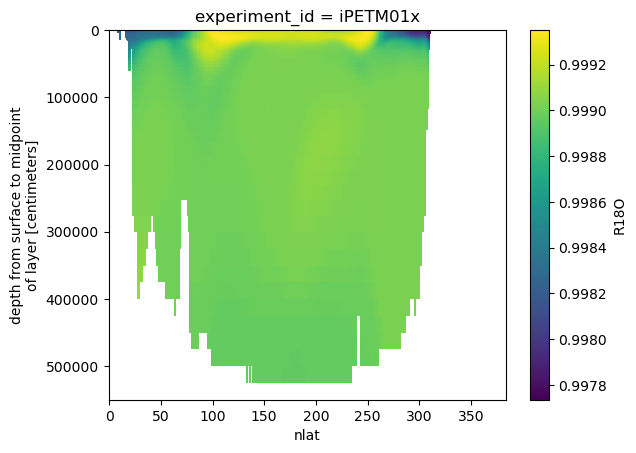

In [7]:
ds["R18O"].sel(experiment_id="iPETM01x").isel(nlon=100).mean("time").plot()
plt.gca().invert_yaxis()

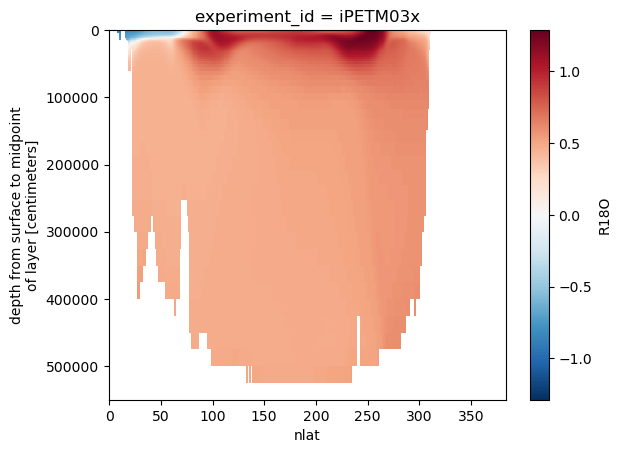

In [12]:
(((ds["R18O"]/0.9985)-1)*1e3).sel(experiment_id="iPETM03x").isel(nlon=100).mean("time").plot()
plt.gca().invert_yaxis()

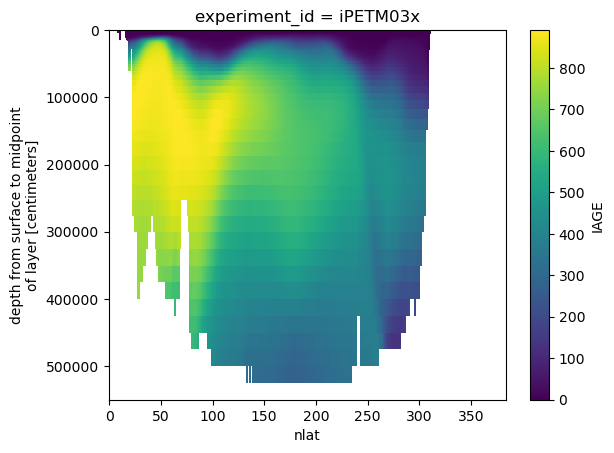

In [15]:
ds['IAGE'].sel(experiment_id="iPETM03x").isel(nlon=100).mean("time").plot()
plt.gca().invert_yaxis()

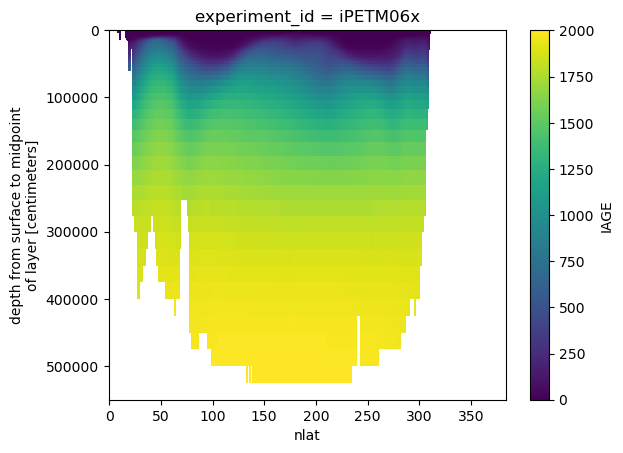

In [13]:
ds['IAGE'].sel(experiment_id="iPETM06x").isel(nlon=100).mean("time").plot()
plt.gca().invert_yaxis()

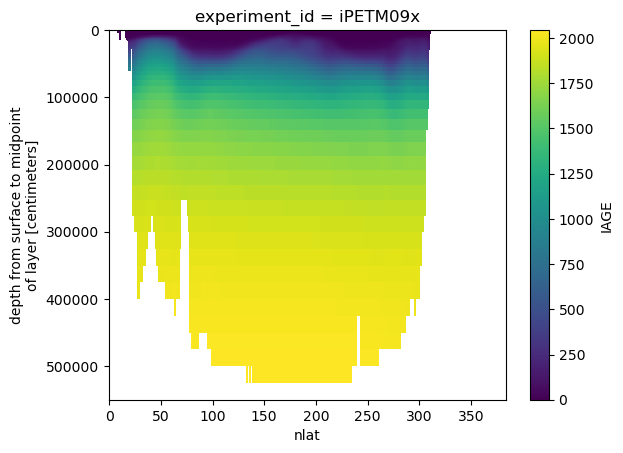

In [14]:
ds['IAGE'].sel(experiment_id="iPETM09x").isel(nlon=100).mean("time").plot()
plt.gca().invert_yaxis()

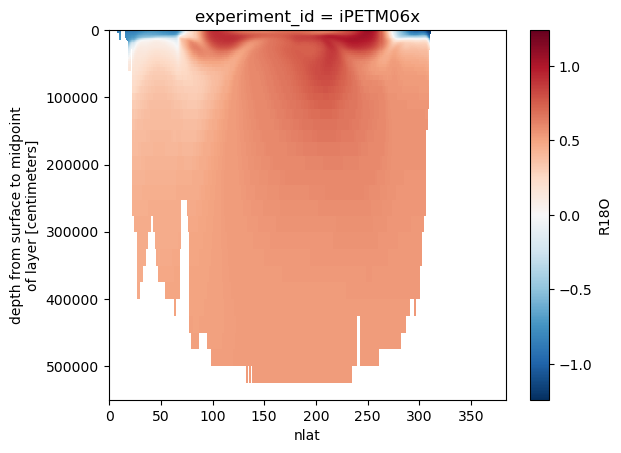

In [11]:
(((ds["R18O"]/0.9985)-1)*1e3).sel(experiment_id="iPETM06x").isel(nlon=100).mean("time").plot()
plt.gca().invert_yaxis()

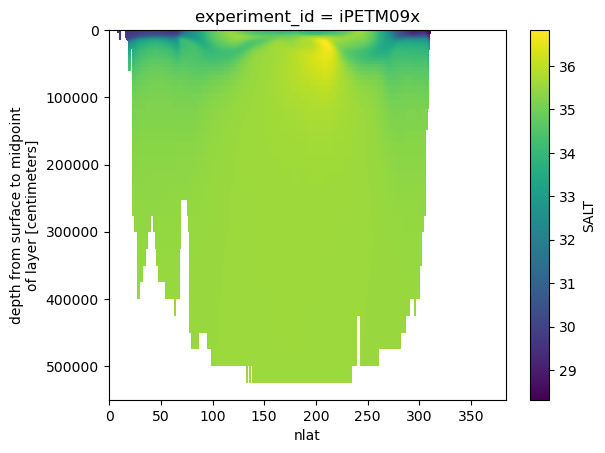

In [64]:
ds["SALT"].sel(experiment_id="iPETM09x").isel(nlon=100).mean("time").plot()
plt.gca().invert_yaxis()